<a href="https://colab.research.google.com/github/Hyun-Jun-Lee/News_Analysis/blob/main/text_analysist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
!pip install konlpy

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from konlpy.tag import Okt
import datetime
from wordcloud import WordCloud

In [3]:
stopwords = pd.read_csv('/content/drive/MyDrive/stopword.csv')
stopwords.sample(10)

,stopdword
10,의해
477,너희들
640,아니
173,과연
421,그런즉
176,생각한대로
205,흥
317,까지
605,중의하나
5,어


In [4]:
data = pd.read_csv('/content/drive/MyDrive/1-8월 뉴스.csv')
data

,title,text,url,media,date
0,무너지는 일과 삶의 경계···노동이 녹아내린다,이 땅에서 ‘비정규직’이라는 표현이 광범위하게 쓰인 지 20여년. 정부가 신규 일자...,https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-01-01
1,일자리 아닌 일거리···'일정치 않음'을 살다 [녹아내리는 노동],ㆍ①일자리보다 일거리\n\n노동의 미래를 모두 알 수는 없다. 다만 현실에서 일어나...,https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-01-01
2,이곳은…기계의 정확도 높이는 ‘인간부품’ 육성공장 아닐까 [녹아내리는 노동],ㆍ①일자리보다 일거리\n\nㆍAI 학습데이터 가공 기업 ‘크라우드웍스’ 교육장 참관...,https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-01-01
3,"지혜씨, 지훈씨를 부탁해! [인포그래픽]",새로 태어나는 아이들은 줄어들고 어르신들은 계속 나이를 먹어 갑니다. 2020년 새...,https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-01-01
4,"[20대 리포트] “20대, 함부로 판단말라… 내 길 내가 간다”",새천년의 시작과 함께 세상에 나온 2000년대생들이 어느덧 사회 변화를 이끌 20대...,https://news.naver.com/main/read.nhn?mode=LPOD...,국민일보,2020-01-01
...,...,...,...,...,...
29036,"""2.5단계로 무급휴가 요구""… 코로나 재유행에 살아난 '갑질'",직장인 A씨는 수도권 사회적 거리두기 2.5단계를 시행하는 30일부터 다음달 6일...,https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-08-31
29037,모호한 조치ㆍ 깜깜이 환자 비율 40%육박... 거리두기 2.5단계 효과 있을까,"30일 0시부터 서울 전역에 강화된 사회적 거리두기(2.5단계)가 시행됐지만, 전문...",https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-08-31
29038,내일부터 서울 시내버스 밤 9시 이후 20% 감축… 주말 수준으로,수도권의 ‘사회적 거리두기’ 2.5단계 시행 기간에 맞춰 서울 시내버스의 야간 운행...,https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-08-31
29039,집단휴업 두고 전공의 vs 정부 '강대강 대치'... 의료공백 장기화 불가피,21일부터 10일째 무기한 집단휴진을 이어가고 있는 전공의(인턴ㆍ레지던트)들과 정부...,https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-08-31


In [37]:
data.isna().sum()

title    0
text     0
url      0
media    0
date     0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29041 entries, 0 to 29040
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   29041 non-null  object
 1   text    29041 non-null  object
 2   url     29041 non-null  object
 3   media   29041 non-null  object
 4   date    29041 non-null  object
dtypes: object(5)
memory usage: 1.1+ MB


In [36]:
data['media'].value_counts()

경향신문    3715
세계일보    3636
조선일보    3435
동아일보    3316
한국일보    3073
문화일보    2891
서울신문    2817
국민일보    2320
한겨레     2276
중앙일보    1562
Name: media, dtype: int64

In [26]:
# 'date' 컬럼 datetime 형으로 변환 후 월일 형태로
data['date'] = pd.to_datetime(data['date'])
data['date'] = data['date'].dt.strftime('%m/%d')
data.sample(5)

,title,text,url,media,date
16540,올 경제성장률 0.2% ‘사실상 멈춤’… 증세 논의 필요성 커져,"KDI, 2019년 말 2.1%서 대폭 하향 / 상반기 수출·내수 위축 극심해 / ...",https://news.naver.com/main/read.nhn?mode=LPOD...,세계일보,05/21
19888,‘강경 투쟁’ 배수진 쳤지만…묘수 없는 통합당,"국회 일정 보이콧 파장 / 강경파 “민주, 선심 쓰듯이 협상 / 법사위 축소·개편안...",https://news.naver.com/main/read.nhn?mode=LPOD...,세계일보,06/17
4988,"여론 떠밀려 ‘칼럼 고발’ 취하한 與, 사과는 안해",당 비판 칼럼 쓴 교수 고발 논란에… 민주 “과도함 인정” 유감만 표명\n언론중재위...,https://news.naver.com/main/read.nhn?mode=LPOD...,동아일보,02/15
8168,‘확진’ 콜센터 직원 지난달 말에 첫 증상… 열흘 넘게 감염에 노출,최초 확진자 이전 ‘증상 환자’ 확인… 발병일 분석해 최초 감염자 추적\n\n대중교...,https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,03/12
20885,“빨갱이 가족이란 낙인 두려워…금정굴 쪽은 쳐다도 안 봤어요”,[서울신문]\n“어려서는 내가 금정굴을 하루이틀 걸러 다니면서 무섭지도 않은지 거길...,https://news.naver.com/main/read.nhn?mode=LPOD...,서울신문,06/25


In [27]:
# 필요한 column만
df = data[['title','text','date']]
df

,title,text,date
0,무너지는 일과 삶의 경계···노동이 녹아내린다,이 땅에서 ‘비정규직’이라는 표현이 광범위하게 쓰인 지 20여년. 정부가 신규 일자...,01/01
1,일자리 아닌 일거리···'일정치 않음'을 살다 [녹아내리는 노동],ㆍ①일자리보다 일거리\n\n노동의 미래를 모두 알 수는 없다. 다만 현실에서 일어나...,01/01
2,이곳은…기계의 정확도 높이는 ‘인간부품’ 육성공장 아닐까 [녹아내리는 노동],ㆍ①일자리보다 일거리\n\nㆍAI 학습데이터 가공 기업 ‘크라우드웍스’ 교육장 참관...,01/01
3,"지혜씨, 지훈씨를 부탁해! [인포그래픽]",새로 태어나는 아이들은 줄어들고 어르신들은 계속 나이를 먹어 갑니다. 2020년 새...,01/01
4,"[20대 리포트] “20대, 함부로 판단말라… 내 길 내가 간다”",새천년의 시작과 함께 세상에 나온 2000년대생들이 어느덧 사회 변화를 이끌 20대...,01/01
...,...,...,...
29036,"""2.5단계로 무급휴가 요구""… 코로나 재유행에 살아난 '갑질'",직장인 A씨는 수도권 사회적 거리두기 2.5단계를 시행하는 30일부터 다음달 6일...,08/31
29037,모호한 조치ㆍ 깜깜이 환자 비율 40%육박... 거리두기 2.5단계 효과 있을까,"30일 0시부터 서울 전역에 강화된 사회적 거리두기(2.5단계)가 시행됐지만, 전문...",08/31
29038,내일부터 서울 시내버스 밤 9시 이후 20% 감축… 주말 수준으로,수도권의 ‘사회적 거리두기’ 2.5단계 시행 기간에 맞춰 서울 시내버스의 야간 운행...,08/31
29039,집단휴업 두고 전공의 vs 정부 '강대강 대치'... 의료공백 장기화 불가피,21일부터 10일째 무기한 집단휴진을 이어가고 있는 전공의(인턴ㆍ레지던트)들과 정부...,08/31


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29041 entries, 0 to 29040
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   29041 non-null  object
 1   text    29041 non-null  object
 2   date    29041 non-null  object
dtypes: object(3)
memory usage: 680.8+ KB


In [29]:
# 한글,공백 제외하고 제거
df['title'] = df['title'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df['text'] = df['text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df.sample(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,text,date
24754,강남 재건축 구분없는 임대주택 수용 땐 층 허용,조건부 용적률 완화 선회 제시 조건 엄격해 실효성 의문정부여당이 조만간 발표될 서...,07/27
4100,질본 이제야 새 지침 안다녀와도 의사가 판단해 검사,우한 폐렴 확산방문 감염 나온지 일만에 뒷북전문가 의사들에 책임 떠넘긴 것정부는 중...,02/07
24135,여당 대선주자들 재보선 공천 놓고 때 이른 공개 설전,경향신문 더불어민주당 대선주자들이 내년 월 서울부산시장 재보궐 선거 공천 문제를 놓...,07/22
17604,홍콩보안법 통과 정보기관 홍콩서 공식활동 길 열려,홍콩 사태 전인대 통과한 홍콩보안법처벌 수위 등 한두달 내 발표마카오 보안법은 최대...,05/29
24230,단독 맥줏집 했던 이인영 아들 입찰 없이 서울시 용역 따내,스위스 유학 전엔 맥줏집 운영 만원대 디자인 용역 계약이인영 통일부 장관 후보자의 ...,07/22
8951,불안분노우울 취약집단 심리방역 절실,서울신문 취업준비생 박지영가명씨는 이달부터 될 수 있으면 대중교통을 이용하지 않는다...,03/19
16004,상대를 나쁜 놈 아닌 후진 놈 만들어라,진중권 토론회 나와 뇌 없는 통합당 의원들 학습 좀 해야 김종인 비대위 갖고 왈가...,05/16
10777,코로나 팬데믹대구 명서울 명 해외 지속 확산세,국내 확진자 만명대 진입지난 월 일 국내 첫 확진자가 나온 지 일 만에 국내 신종 ...,04/03
17859,미니애폴리스 등 한인상점 곳 피해교민들 폭동 악몽 재연될라 긴장,미국 백인 경찰의 가혹행위로 비무장한 흑인이 숨지면서 촉발된 시위가 격렬해지면서 일...,06/01
10679,피말리는 수도권 민주 석 중 최소 석 통합 석 넘겨 당,총선 지역구 의석 절반 걸린 서울경기인천민주당 곳은 확실 서울인천서 석 늘리고 경...,04/02


## title 명사 추출

In [30]:
okt = Okt()

In [31]:
title_nouns = []
for sentence in tqdm(df['title']):
    tokenized_sentence = okt.nouns(sentence) # 명사만 추출
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    title_nouns.append(stopwords_removed_sentence)

100%|██████████| 29041/29041 [01:06<00:00, 436.22it/s]


In [32]:
# 한글자 (년,명,월 등)은 제외
title_nouns_list = []
for li in title_nouns:
    for n in li:
        if len(n)>1:
            title_nouns_list.append(n)

### Wordcloud 시각화

In [35]:
# 명사 빈도
count = Counter(title_nouns_list)
title_nouns_cnt = count.most_common(10)
for i in title_nouns_cnt:
    print(i)

('코로나', 2912)
('정부', 1194)
('대통령', 1081)
('감염', 998)
('통합', 989)
('한국', 976)
('확산', 935)
('비상', 912)
('단독', 752)
('확진', 697)


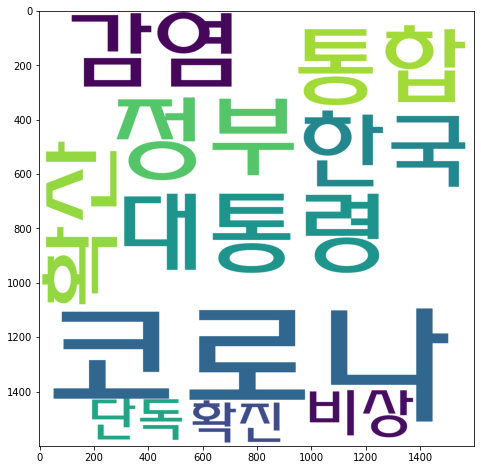

In [56]:
wc = WordCloud(font_path='/content/drive/MyDrive/HYSUPM.TTF', background_color='white',width=800, height=800, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(dict(title_nouns_cnt))
plt.figure(figsize=(10,8))
plt.imshow(gen)

## 코로나 일별 확진자 data 추가

In [60]:
covid = pd.read_csv('/content/drive/MyDrive/전국코로나확진자추이.csv',encoding='cp949')
covid

,날짜,확진자수,일일 확진자
0,2020.03.02,3736,3736
1,2020.03.03,4811,1075
2,2020.03.04,5328,517
3,2020.03.05,5766,438
4,2020.03.06,6284,518
...,...,...,...
178,2020.08.27,18706,441
179,2020.08.28,19077,371
180,2020.08.29,19400,323
181,2020.08.30,19699,299
